0: Fake News 1: True News

In [ ]:
import numpy as np
import pandas as pd 
import re

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import string 


import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Data Collection & per-processing**

In [ ]:
true_data = pd.read_csv('/content/True.csv')
fake_data = pd.read_csv('/content/Fake.csv')

In [ ]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_data["class"] = 1
true_data['class'] = 0


In [ ]:
fake_data.shape, true_data.shape

((23481, 5), (21417, 5))

In [ ]:
merge_data = pd.concat([fake_data, true_data], axis = 0)
merge_data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


In [ ]:
merge_data.std()

<ipython-input-43-5486d427f0af>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merge_data.std()


class    0.499477
dtype: float64

In [ ]:
merge_data.columns


Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
merge_data.shape

(44898, 5)

In [ ]:
merge_data = merge_data.drop(['text','subject','date'], axis = 1)

In [ ]:
merge_data.isnull().sum()

title    0
class    0
dtype: int64

In [ ]:
merge_data = merge_data.sample(frac = 1)

In [ ]:
merge_data.head

<bound method NDFrame.head of                                                    title  class
16951  Amid South Korea freeze, China says cultural e...      1
1001    Former GOP Rep Throws Support Behind Obamacar...      0
20307       Islamic State flags not flying in Bosnia: PM      1
8001   Obama names U.S. ambassador to Cuba, setting u...      1
565     CNN Reporter Just Asked Trump The One Questio...      0
...                                                  ...    ...
14888  Tokyo governor quits as head of conservative o...      1
13087  CLINTON’S EPIC LABOR DAY COUGH ATTACK: Hillary...      0
5095    Nancy Pelosi Slams ‘Trumpian Stupidity’ And H...      0
17175  Philippines arrests militant widow for trying ...      1
7695   Clinton leading among young voters, Harvard po...      1

[44898 rows x 2 columns]>

# **Stemming**

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
merge_data['title'] = merge_data['title'].apply(stemming)

In [ ]:
print(merge_data['title'])

16951    amid south korea freez china say cultur exchan...
1001     former gop rep throw support behind obamacar b...
20307                       islam state flag fli bosnia pm
8001        obama name u ambassador cuba set confirm fight
565      cnn report ask trump one question want hear video
                               ...                        
14888    tokyo governor quit head conserv opposit parti...
13087    clinton epic labor day cough attack hillari co...
5095      nanci pelosi slam trumpian stupid verbal poo poo
17175     philippin arrest milit widow tri recruit fighter
7695      clinton lead among young voter harvard poll find
Name: title, Length: 44898, dtype: object


# **Separating & Labeling Data**

In [ ]:
X = merge_data['title'].values
Y = merge_data['class'].values

In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
print(X)

['amid south korea freez china say cultur exchang take temperatur'
 'former gop rep throw support behind obamacar becom unemploy pre exist condit'
 'islam state flag fli bosnia pm' ...
 'nanci pelosi slam trumpian stupid verbal poo poo'
 'philippin arrest milit widow tri recruit fighter'
 'clinton lead among young voter harvard poll find']


# **TfidfVectorizer**

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 11511)	0.4706979475337052
  (0, 11378)	0.23681385095648283
  (0, 10783)	0.2591198527199775
  (0, 10050)	0.1579222746388279
  (0, 6368)	0.22782948666805114
  (0, 4510)	0.38421088867079356
  (0, 3935)	0.38138631779758647
  (0, 2740)	0.37381437390993355
  (0, 2019)	0.23447330107404937
  (0, 365)	0.30097405013044937
  (1, 12150)	0.37800646811312244
  (1, 11624)	0.2891658979092981
  (1, 11254)	0.1971340302293547
  (1, 9536)	0.28048166735586744
  (1, 8876)	0.3257592584600658
  (1, 7993)	0.24607047368246457
  (1, 4859)	0.21372164332688737
  (1, 4433)	0.22758407392359564
  (1, 3953)	0.35107789912613413
  (1, 2379)	0.3375202747393862
  (1, 1012)	0.27614844276566236
  (1, 991)	0.27997783550866195
  (2, 10974)	0.27141448827331827
  (2, 8738)	0.3351345153939626
  (2, 5976)	0.3464068963808858
  :	:
  (44894, 2173)	0.16224154619276468
  (44894, 1709)	0.19338165925470618
  (44894, 661)	0.18235030346029507
  (44895, 12450)	0.3287922532314226
  (44895, 11916)	0.3709679409202509
  (44895, 11155)	0

# **Splitting the data into Test and Train**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Accuracy Score**
**Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction_lr = model_lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_lr)
# accuracy score on the test data
X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_lr)

Accuracy score of the training data :  0.9608831226683
Accuracy score of the test data :  0.9416481069042316


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)


DecisionTreeClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction_dtc = model_dtc.predict(X_train)
training_data_accuracy_dtc = accuracy_score(X_train_prediction_dtc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_dtc )
# accuracy score on the test data
X_test_prediction_dtc = model_dtc.predict(X_test)
test_data_accuracy_dtc = accuracy_score(X_test_prediction_dtc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_dtc)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.899554565701559


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(random_state=0)
model_gbc.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# accuracy score on the training data
X_train_prediction_gbc = model_gbc.predict(X_train)
training_data_accuracy_gbc = accuracy_score(X_train_prediction_gbc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_gbc)

# accuracy score on the test data
X_test_prediction_gbc = model_gbc.predict(X_test)
test_data_accuracy_gbc = accuracy_score(X_test_prediction_gbc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_gbc)

Accuracy score of the training data :  0.8470961634834901
Accuracy score of the test data :  0.8433184855233853


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# accuracy score on the training data
X_train_prediction_rfc = model_rfc.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_rfc)
# accuracy score on the test data
X_test_prediction_rfc = model_rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
print('Accuracy score of the test data : ',test_data_accuracy_rfc)


Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9396436525612473


# **Cross Valadation**
**Logistic Regression**

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(), X, Y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.94309577 0.94376392 0.94465479 0.9432008  0.94063927]
94.31


**Decision Tree Classifier**

In [ ]:
cv_score_drc = cross_val_score(DecisionTreeClassifier(), X, Y, cv=5)

print(cv_score_drc)

mean_accuracy_drc = sum(cv_score_drc)/len(cv_score_drc)

mean_accuracy_drc = mean_accuracy_drc*100

mean_accuracy_drc = round(mean_accuracy_drc, 2)

print(mean_accuracy_drc)

[0.90612472 0.90746102 0.90289532 0.90511193 0.90143669]
90.46


**Gradient Boosting Classifier**

In [ ]:
cv_score_gbc = cross_val_score(GradientBoostingClassifier(), X, Y, cv=5)

print(cv_score_gbc)

mean_accuracy_gbc = sum(cv_score_gbc)/len(cv_score_gbc)

mean_accuracy_gbc = mean_accuracy_gbc*100

mean_accuracy_gbc = round(mean_accuracy_gbc, 2)

print(mean_accuracy_gbc)

[0.84476615 0.84376392 0.85868597 0.84775587 0.84664217]
84.83


**Random Forest Classifier**

In [ ]:
cv_score_rfc = cross_val_score(RandomForestClassifier(), X, Y, cv=5)

print(cv_score_rfc)

mean_accuracy_rfc = sum(cv_score_rfc)/len(cv_score_rfc)

mean_accuracy_rfc = mean_accuracy_rfc*100

mean_accuracy_rfc = round(mean_accuracy_rfc, 2)

print(mean_accuracy_rfc)

[0.94465479 0.94131403 0.94443207 0.94342354 0.93818911]
94.24


# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

**Logistic Regression**

The classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      4696
           1       0.91      0.93      0.92      4284

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



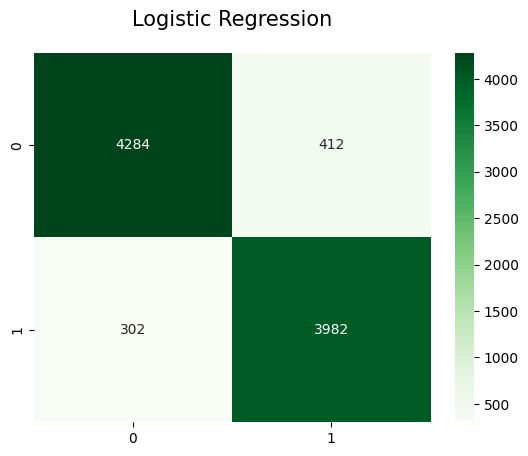

In [ ]:
import matplotlib.pyplot as plt
lr = cross_val_predict(model_lr,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,lr),annot=True,fmt='3.0f',cmap="Greens")

plt.title('Logistic Regression', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Logistic Regression:','\n',classification_report(Y_test,lr))

**Decision Tree Classifier**

The classification report for Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4696
           1       0.85      0.87      0.86      4284

    accuracy                           0.86      8980
   macro avg       0.86      0.86      0.86      8980
weighted avg       0.86      0.86      0.86      8980



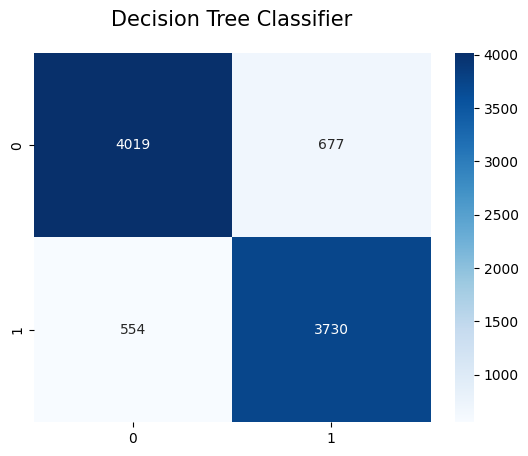

In [ ]:
import matplotlib.pyplot as plt
dtc = cross_val_predict(model_dtc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,dtc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Decision Tree Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Decision Tree Classifier:','\n',classification_report(Y_test,dtc))

**Gradient Boosting Classifier**

The classification report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      4696
           1       0.78      0.95      0.86      4284

    accuracy                           0.85      8980
   macro avg       0.86      0.85      0.85      8980
weighted avg       0.86      0.85      0.85      8980



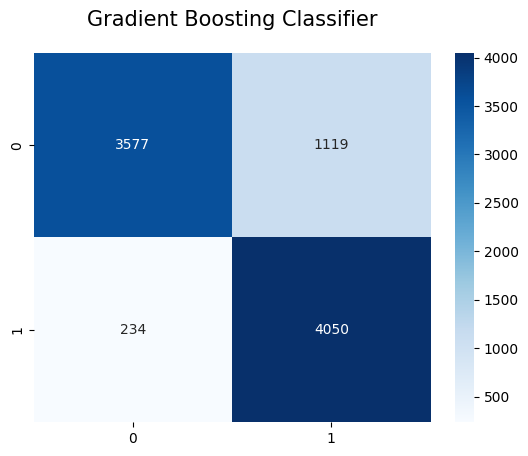

In [ ]:
import matplotlib.pyplot as plt
gbc = cross_val_predict(model_gbc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,gbc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Gradient Boosting Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Gradient Boosting Classifier:','\n',classification_report(Y_test,gbc))

**Random Forest Classifier**

The classification report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      4696
           1       0.90      0.94      0.92      4284

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



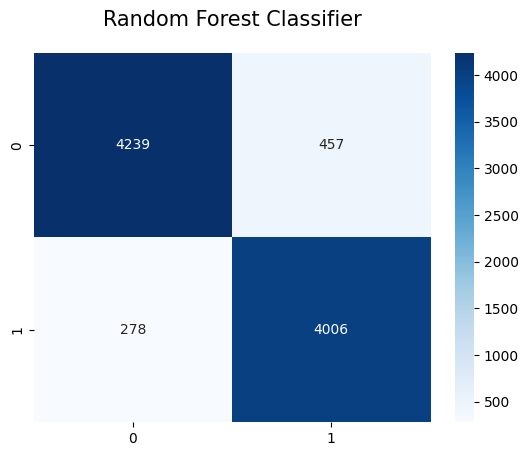

In [ ]:
import matplotlib.pyplot as plt
rfc = cross_val_predict(model_rfc,X_test,Y_test,cv=5)

sns.heatmap(confusion_matrix(Y_test,rfc),annot=True,fmt='3.0f',cmap="Blues")

plt.title('Random Forest Classifier', y=1.05, size=15)
from sklearn.metrics import classification_report
print('The classification report for Random Forest Classifier:','\n',classification_report(Y_test,rfc))

# **Prediction Model**

In [ ]:
X_new = X_test[3]

prediction = model_lr.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Fake')
else:
  print('The news is Real')

[0]
The news is Fake
